## Конкрусное задание по программированию для программы Moove. 
Данный нотебук разработан [мной](https://t.me/kishkun) не для коммерческого использования

# Data analysis

Before building a machine learning model and trying to get into the leaderboard, it is necessary to understand what we are working with: what data we have, what is the goal, what logical hypotheses can be proposed based on the available data.

Therefore, the plan in our problem is classical:
1. Explore the data
2. We build graphs, look at dependencies, offer hypotheses
3. Clean up the data and prepare it for building the model
4. We make an assumption which model can be used here and adapt the data to the proposed model
5. We divide the data into parts to be able to "honestly" learn and validate the model in the future
6. Building and training the model
7. Validate the model, evaluate the metrics, explore the problems
8. Return to step 3 or 6 depending on the results (tuning the model / building a new one / updating the data)
9. Submit the result, watch soon, cry - go back to step 3 or 6
10. Profit! We are at the top!

Импортируем стартер-пак для классического анализа данных

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

В данном случае даже про деление на трэйн и тест думать не нужно, все уже готово

In [2]:
data = os.path.join(os.getcwd(),'kaggle')
df_train = pd.read_csv(os.path.join(data,'train.csv'))
df_test = pd.read_csv(os.path.join(data,'test.csv'))
ids = df_test['Id'].values

## Построение гипотез. Целевая переменная

In [3]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Для построения гипотез, необходимо четко понимать задачу: 
в нашем случае цель - предсказание цены на жилой дом. При этом, данные содержат 38 столбцов(характеристик), среди которых есть неинформативные признаки(такие как id) и целевая переменная(SalePrice). Для начала исследуем целевую переменную.

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

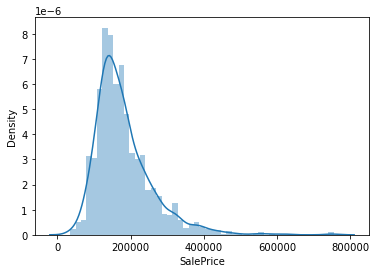

In [6]:
sns.distplot(df_train['SalePrice'])

Какие выводы можно сделать? 
Во-первых, кажется, данные выглят корректно (цена больше 0, нет явных выбросов) и есть явный тренд в сторону смещенного нормального распределения с мат.ожиданием в ~18000 и std ~ 79000 (довольно большой разброс). 

Финальный шаг: 
запишем целевую переменную в отдельную переменную, убрав ее из признаков

In [7]:
y_train = df_train.SalePrice.values
x_train = df_train.drop('SalePrice', 1)

## Построение гипотез. Признаки

Для нормального процесса построения гипотез, необходимо изучить данные, описание каждого столбца, построить графики зависимости и уже после делать какие-то выводы. Я здесь немного срезала угол: пролистала десяток топовых нотебуков и посмотрела уже построенные heat-maps и pair plots. Из чего я сделала вывод, что следующие переменные могут играть важную роль в этой проблеме:

1. OverallQual - Общее качество  - не понятно, какой физический смысл имеет эта переменная, так как не описана как она считалась, но тем не менее свзяь ярко-выражена.
2. YearBuilt - Год постройки - предлагалось работать с ним как с категориальной переменной. В процессе анализа данных, было принято решение не использовать данный признак (большая вариантивность - нет явного тренда)
3. TotalBsmtSF.
4. GrLivArea.
5. Neighborhood.
В большинстве нотебуков последнюю переменную исключали, но она кажется логичной и я решила проверить связь самостоятельно. 
Я специально не употребляю термин "корреляция" так как это может быть не совсем корректно. 

Первые две характеристики из нашего списка - категориальные. Поэтому для визуализации нужен график на основе столбчатых диаграмм. Построим boxplot

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

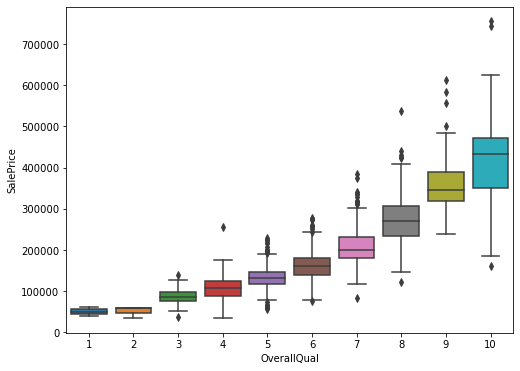

In [8]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y="SalePrice", data=data)

Явный тренд прослеживается

Перейдем к численным признакам

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

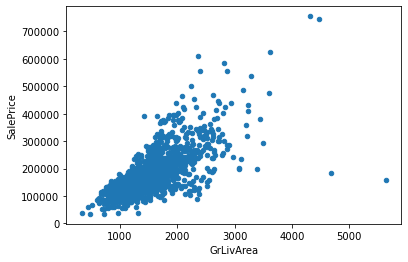

In [9]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

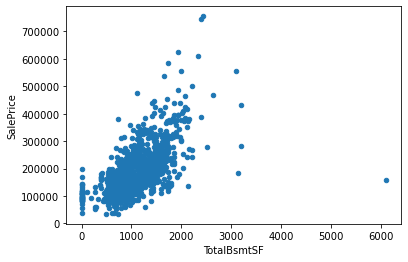

In [10]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice')

Для численных переменных(TotalBsmtSF, GrLivArea) наблюдаем линейный тренд

Рассмотрим отложенный признак - Neighborhood

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

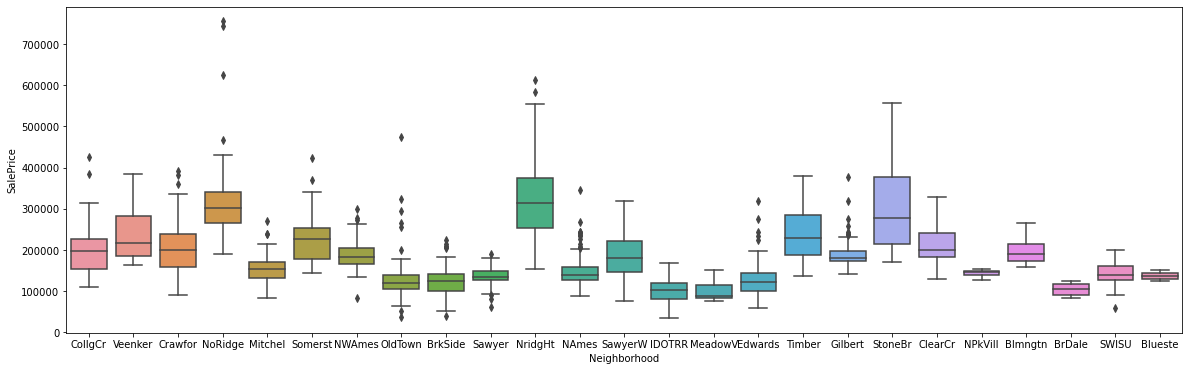

In [11]:
data = pd.concat([df_train['SalePrice'], df_train['Neighborhood']], axis=1)
plt.figure(figsize=(20, 6))
sns.boxplot(x='Neighborhood', y="SalePrice", data=data)

Какой-то явной теенденции нет, но при этом можно выделить, например, дорогие районы(хоть и с очень большим разбросом) и местное "Гетто" - BrDale

Чтобы убедиться, что мы ничего не упускаем - построим свой heatmap

<AxesSubplot:>

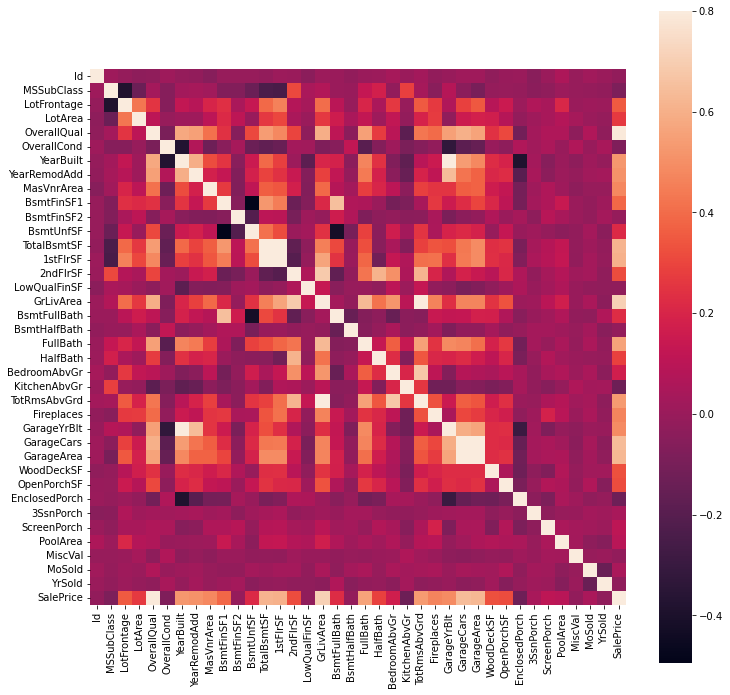

In [12]:
#correlation matrix
corrmat = df_train.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True)

Здесь мы видим подтверждение важности признака OverallQual. Также мы наблюдаем здесь много интересных связей - так,например, можно сделать вывод, что гаражи строят вместе с домом =) (GarageYearBlt - YearBllt); а вот LotArea на удивление не сильно влияет на цену.

Можно еще долго анализировать данные и находить интересные зависимости, но давайте вернемся к итеративной разработке и перейдем к следующему шагу.

## Подготовка данных: заполнение пропусков

Есть несколько классических подходов - дропнуть строки с такими данными, заполнить средним, заполнить чем-то логичным (в зависимости от специфики данных), построить, например,RF и заполнять пропуски итеративно. 
Для начала исследуем пропущенные значения

In [13]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Давайте проанализируем: первые 6  кандидатов имеют большой процент пропущенных значений (больше 17) - так как эти признаки не имели сильной корреляции по предыдущему анализу - заменим на наиболее частое значение
По остальным удалим пропущеннные значения

In [14]:
x_train = x_train.drop((missing_data[missing_data['Total'] > 81]).index,1)
x_train = x_train.apply(lambda x:x.fillna(x.value_counts().index[0]))
x_train.isnull().sum().max()

0

In [15]:
x_train.shape

(1460, 74)

разберемся с ппропущенными значениями в тесте - дропать строки нельзя

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [17]:
df_test = df_test.drop((missing_data[missing_data['Total'] > 81]).index,1)
df_test = df_test.apply(lambda x:x.fillna(x.value_counts().index[0]))

## Подготовка данных. Нормировка и очистка

Удалим идентификаторы, так как они уникальны и неифнормативны. Сразу сделаем тоже для теста

In [18]:
x_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

In [19]:
x_train.shape

(1460, 73)

Энкодинг категориальных переменных - переводим в численные значения. аналогично для теста

In [20]:
x_train.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [21]:
from sklearn.preprocessing import LabelEncoder
cols = x_train.select_dtypes(include='object').columns

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(x_train[c].values)) 
    x_train[c] = lbl.transform(list(x_train[c].values))
    df_test[c] = lbl.transform(list(df_test[c].values))

print('Shape all_data: {}'.format(x_train.shape))

Shape all_data: (1460, 73)


Еще немного очистим данные от выбросов: 

In [22]:
indexes = x_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index 

x_train = x_train.drop(indexes)
y_train = np.delete(y_train, indexes)

In [23]:
y_train.shape

(1458,)

Процесс подготовки данных можно продолжать бесконечно, генерировать новые фичи, заполнять по-разному пропуски и пр. Но давайте пойдем дальше, построим первую модельку и посмотрим что уже имеем

## Построение модели

In [24]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

Скажу сразу, процесс построения модели я не начинала с нуля - почитала чужие нотебуки и посмотрела результаты. Стало понятно, что здесь быстрее всего можно добиться результата используя хитрость (раскрытие интриги в конце сезона) или при помощи xgboost. Так как хотелось повторяемости результатов - начинаем с XGBoost

In [25]:
model_xgb = xgb.XGBRegressor(n_estimators=2200)

Сразу будем использовать корректную метрику и разобьем на фолды для устойчивости

In [26]:
n_folds = 5

def rmsle(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [27]:
x_train.shape

(1458, 73)

In [28]:
model_xgb.fit(x_train, y_train)
xgb_train_pred = model_xgb.predict(x_train)
xgb_pred = model_xgb.predict(df_test)
print(rmsle(y_train, xgb_train_pred))

0.06212630884028025


После нескольких итераций, все еще простой регрессор с болшим количеством эстиматоров дал неплохой результат! 
Пока не выглядит как топ-1 скор: сохраним результат и попробуем засабмитить

In [29]:
xgb_pred

array([121946.336, 144455.5  , 179049.39 , ..., 149236.66 , 112257.555,
       224105.94 ], dtype=float32)

In [30]:
sub = pd.DataFrame()
sub['Id'] = ids
sub['SalePrice'] = xgb_pred
sub.to_csv('submission.csv',index=False)

Такая простая моделька с неплохо подготовленными данными дала на тесте:

Your submission scored 0.14875

~2670 место

Потюним модельку, попробуем немного подняться

In [31]:
model_xgb = xgb.XGBRegressor(reg_lambda=0.8571, n_estimators=2200, nthread = -1)

In [32]:
model_xgb.fit(x_train, y_train)
xgb_train_pred = model_xgb.predict(x_train)
xgb_pred = model_xgb.predict(df_test)
print(rmsle(y_train, xgb_train_pred))

0.05733302685997684


немного лучше на обучении, но хуже на сабмите - 0.15031

## GridSearch

Запустим GridSearch чтобы подобрать параметры получше.

Что будем настраивать:
параметры max_depth, min_child_weight и gamma непосредственно ограничивают сложность модели, subsample и colsample_bytree делают её более устойчивой к шуму за счет добавления случайного выбора наблюдений и предикторов.
reg_lambda и reg_alpha - параметры регуляризации: увеличивая можно сделать модель более устойчивой.

In [33]:
from sklearn.model_selection import GridSearchCV

params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(4,11)], 'max_depth': [2,3,4], 'reg_lambda':[i/10.0 for i in range(7,9)], 'reg_alpha':[i/10.0 for i in range(4,7)]}

model = xgb.XGBRegressor(nthread=-1) 

grid = GridSearchCV(model, params)
grid.fit(x_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_esti...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_paramete

In [34]:
xgb_train_pred = grid.best_estimator_.predict(x_train)
xgb_pred = grid.best_estimator_.predict(df_test)
print(rmsle(y_train, xgb_train_pred))

16130.57791922453


На полный перебор параметров мне не хватило терпения, но ясно, что это не топ-1

Пока эта махина перебирала параметры, я посмотрела все открытые решения в топ-1000 в лидеборде и стало понятно, что можно и не ждать =). 
Собственно, есть два основных решения: 
1. Обучаем все подряд и стакаем, подбирая коэффициенты, чтобы забраться повыше. 
2. Супер-лайфхак(топ-1), который я разберу в самом конце

## Стакаем модельки

Класс для стэкинга моделек позаимствован из сети, суть простая - фитим модельки на фолдах

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet, Lasso
import lightgbm as lgb

class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

Соберем модель, состоящую из набора базовых классификаторов разных типов 

In [37]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=3000, random_state =42)

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005,random_state=42))
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=42))

stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

In [38]:
model_xgb = xgb.XGBRegressor(n_estimators=2200, nthread = -1)
model_xgb.fit(x_train, y_train)

model_lgb = lgb.LGBMRegressor(objective='regression',n_estimators=720)
model_lgb.fit(x_train, y_train)

stacked_averaged_models.fit(x_train.values, y_train)

StackingAveragedModels(base_models=(Pipeline(steps=[('robustscaler',
                                                     RobustScaler()),
                                                    ('elasticnet',
                                                     ElasticNet(alpha=0.0005,
                                                                random_state=42))]),
                                    GradientBoostingRegressor(n_estimators=3000,
                                                              random_state=42),
                                    KernelRidge(alpha=0.6, coef0=2.5, degree=2,
                                                kernel='polynomial')),
                       meta_model=Pipeline(steps=[('robustscaler',
                                                   RobustScaler()),
                                                  ('lasso',
                                                   Lasso(alpha=0.0005,
                                                     

In [39]:
lgb_pred = model_lgb.predict(df_test)
xgb_pred = model_xgb.predict(df_test)
stacked_pred = stacked_averaged_models.predict(df_test.values)

In [40]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [41]:
sub = pd.DataFrame()
sub['Id'] = ids
sub['SalePrice'] = xgb_pred
sub.to_csv('submission.csv',index=False)

Результат все еще далек от топ-1: нужно тюнить параметры каждой модельки, внимательнее отобрать фичи, оценив важность хотя бы после грид сёча и аккуратнее трансформировать данные (привести к единому рааспределению)

## Финал. Лайфхак

Существует датасет тоже на Kaggle, в котором, судя по результатам, тот же датасет разбит иначе. В итоге AmesHousing.csv в том числе содержит часть ответов для нашего теста. Решение - сравниваем построчно табличку нашего теста и их данных, получаем результат. Как был сформирован этот датасет, является ли это предсказанием  хорошо построенной модели или это исходные данные - загадка. 

Но ...

In [42]:
from tqdm import tqdm

train = pd.read_csv('../input/ames-housing-dataset/AmesHousing.csv')
train.drop(['PID'], axis=1, inplace=True)

origin = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
train.columns = origin.columns

test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

print('Train:{}   Test:{}'.format(train.shape,test.shape))

missing = test.isnull().sum()
missing = missing[missing>0]
train.drop(missing.index, axis=1, inplace=True)
train.drop(['Electrical'], axis=1, inplace=True)

test.dropna(axis=1, inplace=True)
test.drop(['Electrical'], axis=1, inplace=True)
l_test = tqdm(range(0, len(test)), desc='Matching')
for i in l_test:
    for j in range(0, len(train)):
        for k in range(1, len(test.columns)):
            if test.iloc[i,k] == train.iloc[j,k]:
                continue
            else:
                break
        else:
            submission.iloc[i, 1] = train.iloc[j, -1]
            break
l_test.close()

submission.to_csv('result-with-best.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '../input/ames-housing-dataset/AmesHousing.csv'

... результат на лицо: 
# топ-1 скор (0.44). (54 место)

Если вам понравился разбор, подписывайтесь на канал, ставьте лайки =) В следующей серии мы разберем как лучше стакать модельки и использовать отбор фичей. 
А пока побеждают такие решения - в мире грустит один математик.